# Random Walks and Monte Carlo

## Random Walk Generation

$\frac{S_{t+dt} - S_t}{S_t} = \mu dt + \sigma \sqrt{dt}\xi_t$

In [1]:
import pandas as pd
import numpy as np


def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [7]:
p = gbm(10, n_scenarios=3)

In [8]:
p.shape

(120, 3)

In [9]:
p.head()

,0,1,2
0,101.126302,105.693712,98.193568
1,105.692551,109.914320,97.321556
2,103.521352,111.866336,95.235791
3,108.428549,110.505948,98.516396
4,109.800719,104.575644,107.285304


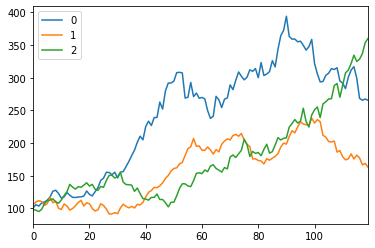

In [10]:
p.plot()

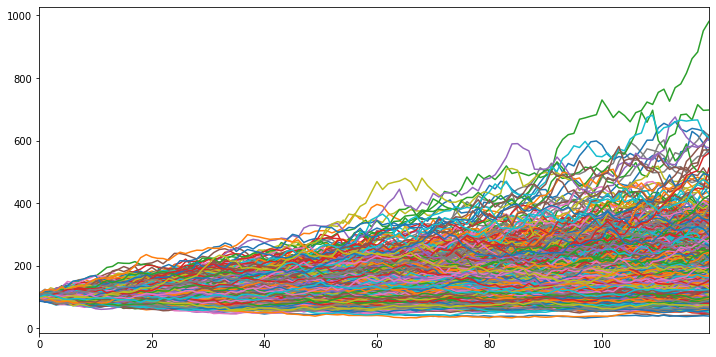

In [18]:
gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [19]:
p = gbm(n_years=10, n_scenarios=1000)

In [27]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_one = np.random.normal(loc=(1+mu*dt),
                                     scale=sigma*np.sqrt(dt),
                                     size=(n_steps, n_scenarios))
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_one).cumprod()
    return prices

In [25]:
%timeit gbm0(n_years=5, n_scenarios=1000)

295 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit gbm1(n_years=5, n_scenarios=1000)

158 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


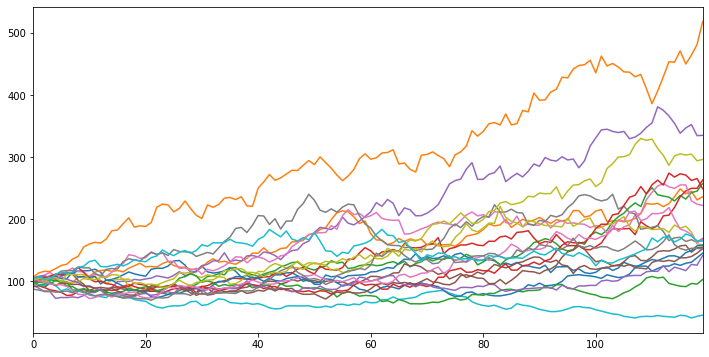

In [29]:
gbm(n_years=10, n_scenarios=20).plot(figsize=(12,6), legend=False)

In [30]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_one = np.random.normal(loc=(1+mu*dt),
                                     scale=sigma*np.sqrt(dt),
                                     size=(n_steps, n_scenarios))
    rets_plus_one[0] = 1
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_one).cumprod()
    return prices

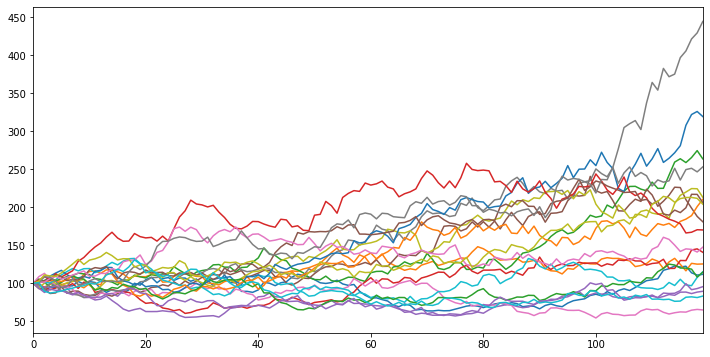

In [31]:
gbm(n_years=10, n_scenarios=20).plot(figsize=(12,6), legend=False)

In [32]:
gbm(n_years=10).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,91.719959,96.278918,97.485998,103.805738,106.103934,94.411601,104.507780,100.743259,94.774661,95.756034,...,102.262115,108.841315,99.869066,95.342759,104.572193,99.260572,93.533646,98.968417,98.601507,95.562638
2,88.382590,101.618108,100.815777,107.288250,105.028231,103.882499,106.663731,100.678811,98.492279,92.385635,...,101.368285,116.818367,105.314696,86.734154,102.048031,98.863732,91.955035,95.624143,98.395404,89.611710
3,94.713424,102.466447,97.496643,101.299816,111.744350,103.406202,105.104292,98.198020,100.710977,99.022102,...,101.595919,131.804234,100.332319,89.543342,107.171814,109.484451,85.004779,98.852848,109.682148,85.347132
4,99.590140,98.361924,99.906726,109.432930,112.957664,99.290224,108.155564,91.211288,94.405147,92.312400,...,100.549750,124.614919,113.157299,90.936482,116.583999,108.420853,77.294758,92.851479,105.807710,87.750555
